<a href="https://colab.research.google.com/github/yustiks/statistics_in_python/blob/master/statistics_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Распределение Стьюдента



Получение информации о распределении

In [0]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
%matplotlib inline

In [0]:
from scipy.stats import t

# Freeze for df=20, loc=0, scale=1 and get the first four moments from stats()
rv = t(df=20, loc=0, scale=1)
mean, var, skew, kurt = rv.stats(moments='mvsk')
mean, var, skew, kurt

(array(0.), array(1.11111111), array(0.), array(0.375))

График плотности распределения

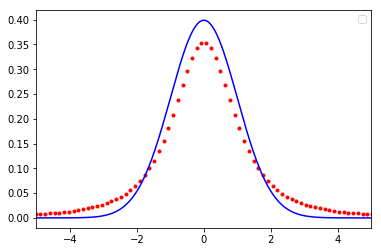

In [0]:
rv = t(df=2, loc=0, scale=1)
x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 1000)
y = rv.pdf(x) 
# A simplistic way to do it
x1 = np.linspace(-5,5,1000)     # define a big enough x interval 
y1 = norm.pdf(x1)              # get the norm.pdf for x interval   

plt.xlim(-5,5)
plt.legend(['Нормальное распределение', 'Стьюдента'])
plt.plot(x,y,'r.')
plt.plot(x1,y1,'b')
plt.show()

Вероятность перехода пороговой границы 

In [0]:
a = 0.05  # set the cutoff

rv = t(df=20, loc=0, scale=1)
x = np.random.normal(size=1)

p = rv.sf(x) # equal but sometimes more accurate than '1-rv.cdf(x)'

if p < a:
    print('Cutoff at: ', x, p)
else:
    print('No cutoff', x, p)

No cutoff [0.86481011] [0.1986988]


# Дискретные распределения

Распределение Бернулли

In [0]:
p = 0.3
mean, var, skew, kurt = stats.bernoulli.stats(p, moments='mvsk')

Бернулли возвращает значения либо 1, либо 0. Чтобы сгенерировать 10000 случайных чисел Бернулли с вероятностью успеха p =0.3, мы будем использовать bernoulli.rvs с 2мя аргументами.

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


[Text(0, 0.5, 'Вероятность'), Text(0.5, 0, 'Бернулли')]

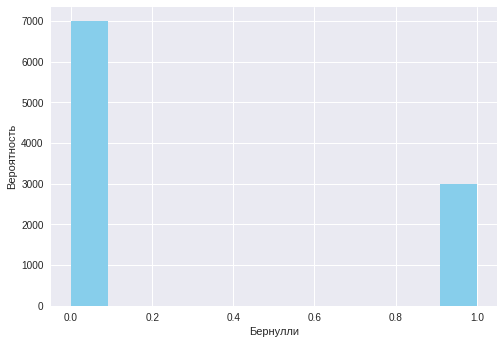

In [37]:
# import seaborn
import seaborn as sns
data_bern = stats.bernoulli.rvs(size=10000,p=0.3)
ax= sns.distplot(data_bern,
                 kde=False,
                 color="skyblue",
                 hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Бернулли', ylabel='Вероятность')

# Биномиальное распределение

Обобщение распределения Бернулли

In [0]:
data_binom = stats.binom.rvs(n=10,p=0.8,size=10000)

Рассматриваем n экспериментов с вероятностью успеха p

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


[Text(0, 0.5, 'Частота (плотность)'),
 Text(0.5, 0, 'Биноминальное распределение')]

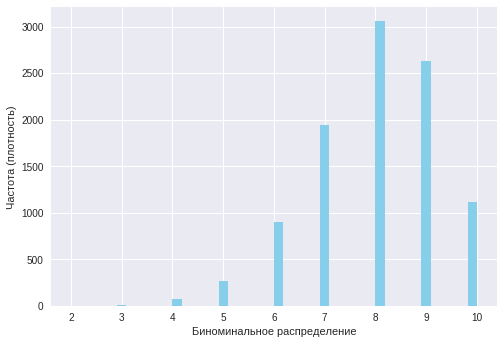

In [40]:
ax = sns.distplot(data_binom,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Биноминальное распределение', ylabel='Частота (плотность)')

# Произвольная случайная величина

Для того чтобы сгенеровать дискретную случайную величину, можно воспользоваться numpy.random.choice:

In [26]:
sample = np.array([1, 4, -1, 0])
probas = [0.15, 0.5, 0.16, 0.19]
np.random.choice(sample, 10, p=probas)

array([ 4,  0,  0,  1, -1, -1,  4,  4,  1, -1])

Она работает следующим образом - мы выбираем, какое количество элементов будет в выборке,и в зависимости от заданной вероятности, в выборку добавляются значения. Например, у значения 4 вероятность появления 0.5 - в итоговой выборке встречается наиболее часто.

# Проверка гипотезы t-критерия Стьюдента

In [0]:
import pandas as pd
import io
import requests
url='http://yustiks.ru/bog_clean.csv'
s=requests.get(url).content
taxi_bog=pd.read_csv(io.StringIO(s.decode('utf-8')))

url='http://yustiks.ru/mex_clean.csv'
s=requests.get(url).content
taxi_mex = pd.read_csv(io.StringIO(s.decode('utf-8')))

Рассмотрим две выборки $X$ и $Y$, и мы хотим сравнить их средние значения $\mu_x$ и $\mu_y$

Тогда рассматривается нулевая гипотеза:
$$
H_0: \mu_x = \mu_y
$$
и альтернативная:

$$
H_1: \mu_x \ne \mu_y.
$$

t-критерий Стьюдента — общее название для класса методов статистической проверки гипотез (статистических критериев), основанных на распределении Стьюдента. Наиболее частые случаи применения t-критерия связаны с проверкой равенства средних значений в двух выборках.

t-статистика строится обычно по следующему общему принципу: в числителе случайная величина с нулевым математическим ожиданием (при выполнении нулевой гипотезы), а в знаменателе — выборочное стандартное отклонение этой случайной величины, получаемое как квадратный корень из несмещённой оценки дисперсии.

После этого t-статистики находится уровень значимости и сравниваетя с заранее заданным p-value. P-value - это вероятность того что данные выборки получились случайным способом.

Если статистика меньше уровня значимости, то нулевая гипотеза отвергается. В противном случае она не отвергается.

# Одновыборочный t-критерий

$$t = \frac{\overline X - m}{s_X / \sqrt{n}}$$

In [48]:
sample = taxi_mex['wait_sec'].sample(n=3000)/60
stats.ttest_1samp(sample, 10)

Ttest_1sampResult(statistic=1.2113984573822072, pvalue=0.22583817370086087)

# Двухвыборочный критерий для независимых выборок

$$t = \frac{\overline X_1 - \overline X_2}{\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}}$$

In [0]:
taxi_mex['pickup_datetime'] = pd.to_datetime(taxi_mex.pickup_datetime)
taxi_mex['month'] = taxi_mex['pickup_datetime'].dt.month

In [50]:
taxi_bog.shape

(3063, 12)

In [51]:
taxi_mex.shape

(12694, 13)

Длительность поездок - отличается ли средняя длительность поездки по Мехико от средней поездки по Боготе?

In [52]:
stats.ttest_ind(taxi_mex['trip_duration'].sample(n=3000), taxi_bog['trip_duration'].sample(n=3000))

Ttest_indResult(statistic=-5.61811116439023, pvalue=2.0173426501596677e-08)

p-value меньше уровня значимости, а это означает, что мы отвергаем нулевую гипотезу, и выборки имеют разные средние

А вот в случае ожидания времени такси мы уже не можем отвергнуть нулевую гипотезу

In [53]:
stats.ttest_ind(taxi_mex['wait_sec'].sample(n=3000), taxi_bog['wait_sec'].sample(n=3000))

Ttest_indResult(statistic=0.37578742925822234, pvalue=0.707088223516454)

# Двухвыборочный критерий для зависимых выборок

Для вычисления эмпирического значения t-критерия в ситуации проверки гипотезы о различиях между двумя зависимыми выборками (например, двумя пробами одного и того же теста с временным интервалом) применяется следующая формула:

In [54]:
control = taxi_mex[taxi_mex.month == 11]['trip_duration'].sample(n=1000)
treatment = taxi_mex[taxi_mex.month == 12]['trip_duration'].sample(n=1000)

stats.ttest_rel(control, treatment)

Ttest_relResult(statistic=-0.8880910999792782, pvalue=0.374705519388131)

# Другие методы тестирования

https://en.wikipedia.org/wiki/A/B_testing - примеры других критериев